In [1]:
import numpy as np
from numpy import random
import matplotlib.pyplot as plt

In [2]:
def f(x):
  return x**3 + x**2 + x + 1

In [3]:
# my model's resctriction is that you can't evaluate for much larger polynomials
a = np.arange(10)
b= np.array(f(a))
a.shape

(10,)

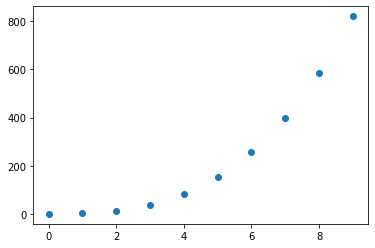

In [4]:
plt.scatter(a,b)

In [5]:
def compute_cost(y_train,y_pred):
  m = y_train.shape[0]
  cost = (0.5/m)*np.sum(np.square(y_train.reshape(m,1) - y_pred.reshape(m,1)))
  return cost

In [6]:
def grads(X_train, y_train, W):
  grad = []
  m = y_train.shape[0]
  order = X_train.shape[0]
  for i in range(0,X_train.shape[0]):
    grad.append((-1/m)*(np.sum((y_train - W.T@X_train)*X_train[i,:])))
  return grad

In [7]:
def update(learning_rate,W, grad):
  for i in range(0,len(grad)):
    W[i] = W[i] - learning_rate*grad[i]
  return W    

In [8]:
def approx(x,W):
  s = 0
  for i in range(0,X_train.shape[0]):
    s = s + W[i]*(x**i)/(10**i)
  return s      

W =  [[-147.8]
 [ 854. ]]
Cost for order  1  approximation =  5705.039999999998
W =  [[  26.2]
 [-451. ]
 [1450. ]]
Cost for order  2  approximation =  154.43999999999951
W =  [[  1.00278491]
 [  9.95368653]
 [100.13013825]
 [999.90601   ]]
Cost for order  3  approximation =  1.3923929594833343e-06
Function which will almost fit the given points will be :[1.00278491] x** 0  + [0.99536865] x** 1  + [1.00130138] x** 2  + [0.99990601] x** 3
Function which will almost fit the given points will be :[1.00278491] x** 0  + [0.99536865] x** 1  + [1.00130138] x** 2  + [0.99990601] x** 3


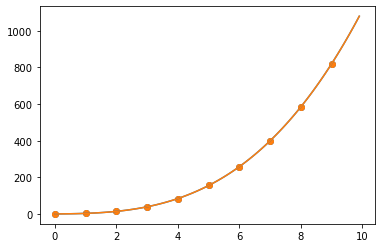

In [9]:
# trying different order approximations
orders = np.arange(1,a.shape[0]+1)
for approx_order in orders:
  # constructing dataset for different order approximation(I have done normalization also otherwise gradients will become big and ultimately the algorithm will diverge)
  X_train = np.concatenate((np.ones((a.shape[0],1)),(a/10).reshape(a.shape[0],1)),axis=1)
  for i in range(2,approx_order+1):
   X_train = np.concatenate((X_train,(a**i/10**i).reshape(a.shape[0],1)),axis=1)
  X_train = X_train.T
  np.random.seed(1)
  # initializing coefficients of polynomials
  W = np.random.randn(X_train.shape[0],1)
  # starting updating the parameters by gradient descent
  for i in range(100001):
    grad = grads(X_train,b,W)
    W = update(0.8,W,grad)
  # update has been finished, now printing the cost
  print("W = ",W)
  print("Cost for order ",approx_order," approximation = ",compute_cost(b,W.T@X_train))
  # if current order fits perfectly, then loop will break
  if compute_cost(b,W.T@X_train) <= 10**(-4):
    print("Function which will almost fit the given points will be :",end="")
    for i in range(0,approx_order):
      print(W[i]/10**i,"x**",i," + ",end="")
    print(W[i+1]/10**(i+1),"x**",i+1)  
    # displaying the results
    x = np.arange(0,10,0.1)
    y_ans = approx(x,W)
    plt.scatter(a,b)
    plt.plot(x,y_ans)
    break
print("Function which will almost fit the given points will be :",end="")
for i in range(0,approx_order):
  print(W[i]/10**i,"x**",i," + ",end="")
print(W[i+1]/10**(i+1),"x**",i+1)  
# displaying the results
x = np.arange(0,10,0.1)
y_ans = approx(x,W)
plt.scatter(a,b)
plt.plot(x,y_ans)
  

In [10]:
a = np.random.randn(4,5)

In [11]:
a

array([[ 0.86540763, -2.3015387 ,  1.74481176, -0.7612069 ,  0.3190391 ],
       [-0.24937038,  1.46210794, -2.06014071, -0.3224172 , -0.38405435],
       [ 1.13376944, -1.09989127, -0.17242821, -0.87785842,  0.04221375],
       [ 0.58281521, -1.10061918,  1.14472371,  0.90159072,  0.50249434]])

In [12]:
mu = np.mean(a,axis=0)

In [13]:
sigma = np.sqrt(np.var(a, axis=0))

In [14]:
normalized = (a-mu)/sigma

In [15]:
normalized

array([[ 5.44218051e-01, -1.12238062e+00,  1.08293984e+00,
        -7.04241587e-01,  5.96278340e-01],
       [-1.60521574e+00,  1.61787091e+00, -1.52405277e+00,
        -8.15233061e-02, -1.50922613e+00],
       [ 1.06165376e+00, -2.47480153e-01, -2.30671949e-01,
        -8.69790215e-01, -2.32711051e-01],
       [-6.56071808e-04, -2.48010133e-01,  6.71784872e-01,
         1.65555511e+00,  1.14565884e+00]])